## General info

Aids: python help file "python_help_240919.ipynb"


Comment your code in your files (.ipynb or .py) to explain your solutions/answers. Save these codes/files under c:\__exam__\Assignments\

On the top of each file write your anonymous code e.g. #ims135-123456



## Grading

max point= 30p 

grade 5: 24-30p (80-100%)

grade 4: 18-23p (60-80%)

grade 3: 12-17 (40-60%)




In [46]:
#useful packages (from python help file)
import numpy as np
from numpy import linalg as LA
import math as mt
import os
from matplotlib.image import imread
import matplotlib.pyplot as plt
from matplotlib import rcParams # for changing default values
import scipy.io as sio
import scipy.optimize
from scipy.optimize import minimize
import timeit
import torch
from torch.autograd import grad
import torch.nn as nn
import torch.optim as optim
import random
from scipy.integrate import odeint

## 1. (3p)

Explain the fundamental differences between regression, classification, and clustering in machine learning. Provide examples of  applications for each of these tasks and tell whether they belong to supervised or unsupervised learning methods.

## 2 (3p), Stefan-Boltzmann's law
Experimental data of how power $P$ [W] is radiated from a black body in terms of its temperature $T$ [K] is given in the file  
exp_data_heat_transfer_250107.mat 

Determine the $k_1$ and $k_2$ in the following assumed relation between $P$ and $T$:
$$
P=k_1 \, T^{k_2}
$$ 

Plot experimental data and your fitted model in a graph. 


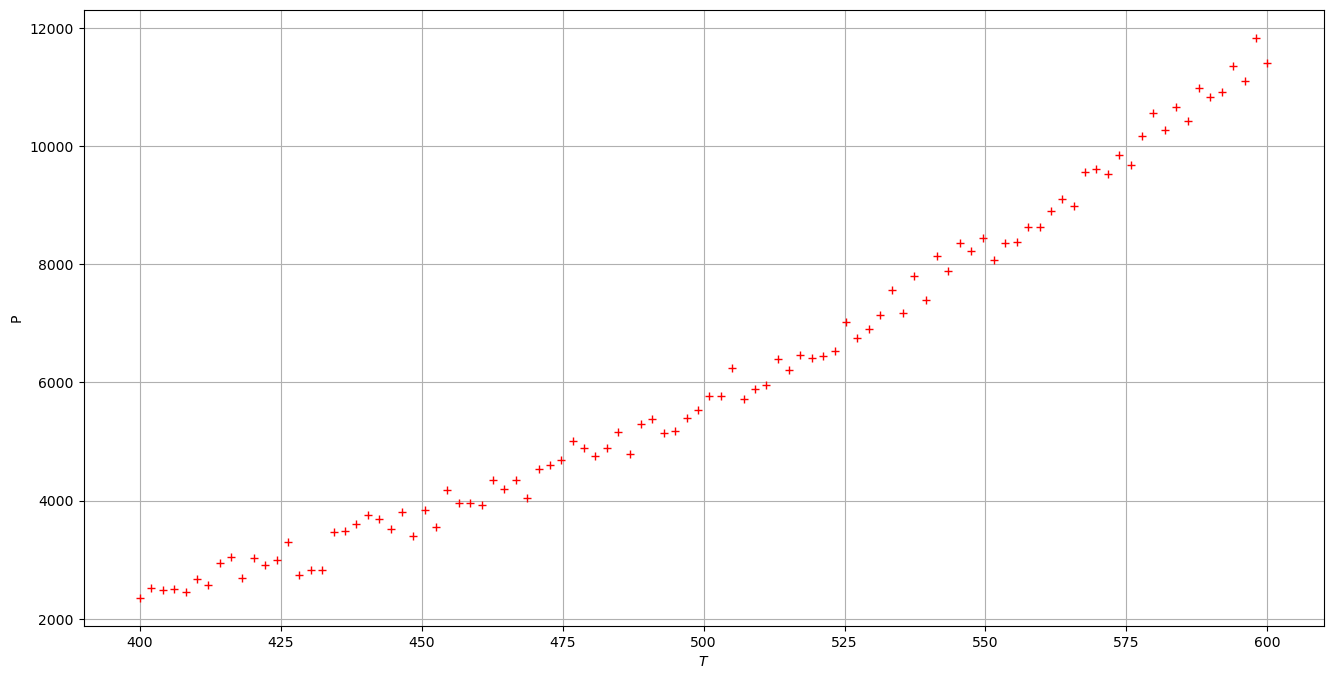

In [138]:
mat_file=sio.loadmat('exp_data_heat_transfer_250107.mat')
P=mat_file['P'] # P
T=mat_file['T'] # T
plt.plot(T[0,:], P[0,:], 'r+', label='experimental data')
plt.xlabel('$T$')
plt.ylabel('P')
plt.grid()

## 3. (4p)
Photo compression. Load the a picture and plot it by the following commands:


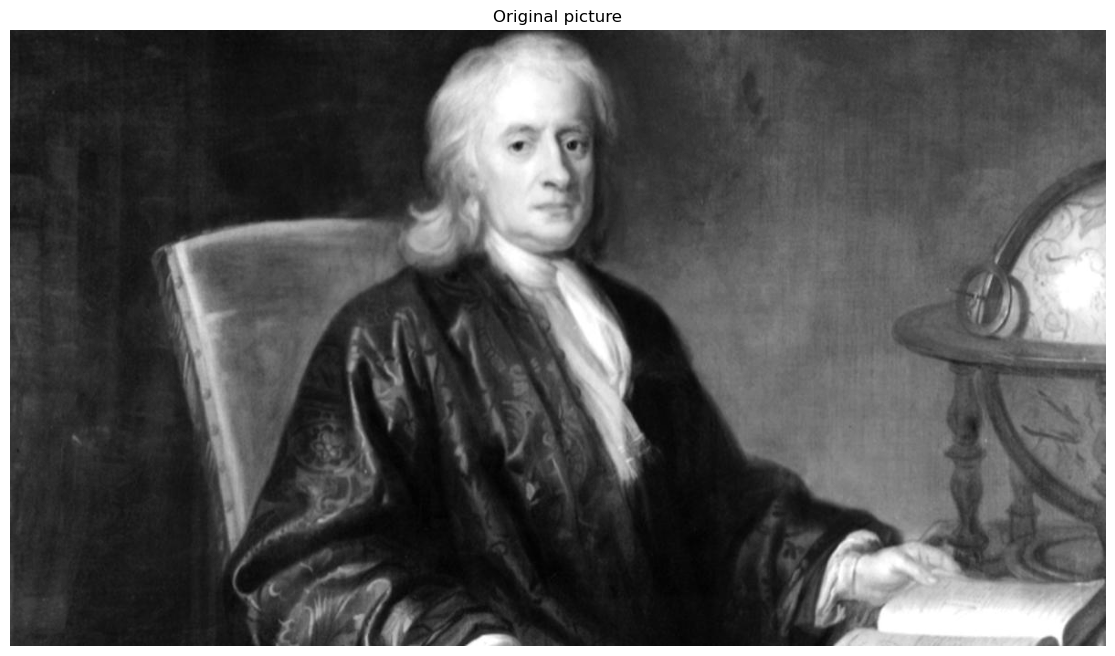

In [ ]:
# Read the screenshot image
filename = 'Isaac_Newton.jpg'  # File path of the image
X = imread(filename)  # Read the image

plt.rcParams['figure.figsize'] = [16, 8]  # Set plot figure size
# Display the original image
img = plt.imshow(X)  # Display the grayscale image
img.set_cmap('gray')  # Set colormap to grayscale
plt.axis('off')  # Turn off axis labels
plt.title('Original picture')  # Set the title
plt.show()  # Show the plot

now use SVD with 5,50 and 200 terms to approximate the full matrix $X$. Determine how many stored values (relative to the full $X$) and the relative error for the different number of terms. 

## 4. (5p)
For the NN in the figure:

<img src="nn_250107.png" alt="Neural Network" width="900"/>


Assume that the weights are random numbers between -1 and 1 (use np.random.rand see python_help file). Also assume that there are nonzero biases for hidden layer 1 and hidden layer 2 (but no biases for output layer). Choose these biases also as random numbers between -1 and 1. 


a) Determine the outputs $\hat{y}_1$ and  $\hat{y}_2$ for $x_1=7$. 

b) The determine the gradients of $\hat{y}_1$ and  $\hat{y}_2$ w.r.t. the parameters of the NN for $x_1=7$. 



## 5. (5p)
The deflection of beams have been measured and the data is collected in the snapshot matrix X where each columns gives the deflections for a beam. There are two types of boundary conditions on the beams.


a) Use SVD to argue why the data contains two beam types. X is found in the beams_250107.mat file.


In [ ]:
#Load data from .mat file
mat_file=sio.loadmat('beams_250107.mat')
X=mat_file['X'] 
y=mat_file['y']



b) Plot the typical mode shapes of the two beam types.

c) The types of beams of the are are given by the matrix $y$ (also found in the beams_250107.mat file). A row of this matrix correspond to the same beam as a column in the input_data matrix, and if the row is (1,0) then it is the first beam type while if the row is (0,1) then it is the second beam type. Train a neural network for classification based on the beam deflection. Use 70% of the data for training and 30% for testing the neural network. How many of the testing cases can your neural network classify?



## 6. (5p)

Use the experimental data from Problem 2 but use 80% as training data by taking the first 80 components of random_vector

In [ ]:
np.random.seed(0) # for getting out the same random variables every time (reproducability)
random_vector = np.random.permutation(100)
mat_file=sio.loadmat('exp_data_heat_transfer_250107.mat')
P=mat_file['P'] # P
T=mat_file['T'] # T
training_index=random_vector[0:79]
validation_index=random_vector[80:99]
T_training=T[0,training_index]
P_training=P[0,training_index]
T_validation=T[0,validation_index]
P_validation=P[0,validation_index]




a) Train a NN to the training data. Assume 1 hidden layer with 10 neurons. Apply the sigmoid activation function (nn.Sigmoid) for the hidden layer. Plot how well/bad the NN fits the training data. You try any regularization parameter and optimization algorithm (with tolerances etc.). Use max 10000 epochs. NOTE: the results is probably bad, therefore don't try too much, instead continue with b)  

  

b ) Scale your data by using MinMaxScaler class (see python_help file) and the following code:

In [116]:
scaler_T = MinMaxScaler() #create a scaler for T
scaled_T = scaler_T.fit_transform(T_training)
scaler_P = MinMaxScaler()  #create a scaler for P
scaled_P = scaler_P.fit_transform(P_training)

Now train the NN against the scaled data instead. Plot how well/bad the NN fits the scaled training data. Also include the validation data in the same plot.

## 7 (5p) Heat transfer
The 1d stationary heat equation is expressed as $-d q/dx+ Q=0$ where $q$  is the heat flux and $Q$ is the source term. For the considered 1d structure the heat conduction coefficient $k$ depends on $x$. Hence, the Fourier's law can be written as modelled as $q=-k(x) \, dT/dx$. Assume a constant heat source $Q=50$, length $L=1$, and $T_{1}=10$ and $T_{2}=20$.

If the temperature field has been determined to
$$
T{\left(x \right)} = 9 L^{2} Q \sqrt[3]{e^{\frac{x}{L}}} + \left(- 3 L Q x + \frac{- 6 L^{2} Q e^{\frac{1}{3}} + 9 L^{2} Q - T_{1} + T_{2}}{-1 + e^{\frac{1}{3}}}\right) e^{\frac{x}{3 L}} + \frac{- 3 L^{2} Q e^{\frac{1}{3}} + T_{1} e^{\frac{1}{3}} - T_{2}}{-1 + e^{\frac{1}{3}}}
$$
determine $k(x)$ by using PINN (use 1 hidden layer with 10 neorins and tanh as activation fcn). Compare your solution against the analytical solution $k(x)=-\frac{x}{3L}$.

The analytical solution for $T(x)$ and the measurement points $x$ are generated as:

In [128]:
#%% Problem data
N = 20
L = 1

def generate_grid_1d(length, samples=20, initial_coordinate=0.0):
    """Generate an evenly space grid of a given length and a given number of samples."""

    # Generate the grid
    x = torch.linspace(initial_coordinate, initial_coordinate + length, samples, requires_grad=True)

    # Reshape on a column tensor and return
    return x.view(samples, 1)


x = generate_grid_1d(L, N)

T1=10; Q=50; T2=20
k_analytic=torch.exp(-x/L/3)
T_analytic = lambda x: 9*L**2*Q*torch.exp(x/L)**(1/3) \
        + (-3*L*Q*x + (-6*L**2*Q*np.exp(1/3) + 9*L**2*Q - T1 + T2)/(-1 + np.exp(1/3)))*torch.exp(x/(3*L)) \
        + (-3*L**2*Q*np.exp(1/3) + T1*np.exp(1/3) - T2)/(-1 + np.exp(1/3))